#**Ocorrências da Proteção Civil**

##Dados da Autoridade Nacional da Proteção Civil 2016-2018


###Jorge Filipe Correia Pinto
###Ricardo Manuel Freitas da Cunha

Instituto Politécnico de Viseu <br/>
Escola Superior de Tecnologia e Gestão de Lamego


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [3]:
# @title Criar ficheiro que agrupa todos os dados
new_file = open("/content/drive/MyDrive/Probabilidade_e_Estatística_JPRC/Versao_Final/datasets/protecao_civil_total.csv", "w")

In [4]:
# @title Abrir ficheiros e escrever no novo protecao_civil_total.csv

for i in range(2016, 2019):
  string = "/content/drive/MyDrive/Probabilidade_e_Estatística_JPRC/Versao_Final/datasets/anpc-" + str(i) + ".csv"
  print(string)

  f = open(string, "r")
  linhas = f.readlines()

  if (i == 2016):
    for x in linhas:
      new_file.write(x)
  else:
    for x in linhas[1:]:
      new_file.write(x)

/content/drive/MyDrive/Probabilidade_e_Estatística_JPRC/Versao_Final/datasets/anpc-2016.csv
/content/drive/MyDrive/Probabilidade_e_Estatística_JPRC/Versao_Final/datasets/anpc-2017.csv
/content/drive/MyDrive/Probabilidade_e_Estatística_JPRC/Versao_Final/datasets/anpc-2018.csv


In [5]:
# @title Armazenar o csv na variavel df

df = pd.read_csv('/content/drive/MyDrive/Probabilidade_e_Estatística_JPRC/Versao_Final/datasets/protecao_civil_total.csv')

<ipython-input-5-252c0d35028d>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Probabilidade_e_Estatística_JPRC/Versao_Final/datasets/protecao_civil_total.csv')


In [6]:
# @title Tratamento de dados e remoção dos inválidos
df = df.dropna(subset=['DataFechoOperacional', 'DataOcorrencia']) #Remover todos os registos invalidos
df = df.reset_index(drop=True) #Reiniciar o indice
df['DataOcorrencia'] = pd.to_datetime(df['DataOcorrencia'], format='%d/%m/%Y %H:%M:%S', errors='coerce') #Converter para datetime
df['DataFechoOperacional'] = pd.to_datetime(df['DataFechoOperacional'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [7]:
# @title Adicionar coluna de duração ao dataset

valores_duracao = []

for x in range(len(df)):
  duracao = df['DataFechoOperacional'][x] - df['DataOcorrencia'][x]
  valores_duracao.append(duracao)

df['DuracaoOcorrencia'] = valores_duracao

In [8]:
# @title Agrupar por distrito
dados_distrito = df.groupby('Distrito').size().reset_index(name='Contagem')

dados_distrito

,Distrito,Contagem
0,0,2
1,AVEIRO,29433
2,BEJA,8591
3,BRAGA,30967
4,BRAGANÇA,11882
5,CASTELO BRANCO,8868
6,COIMBRA,19234
7,FARO,21412
8,GUARDA,9903
9,LEIRIA,21529


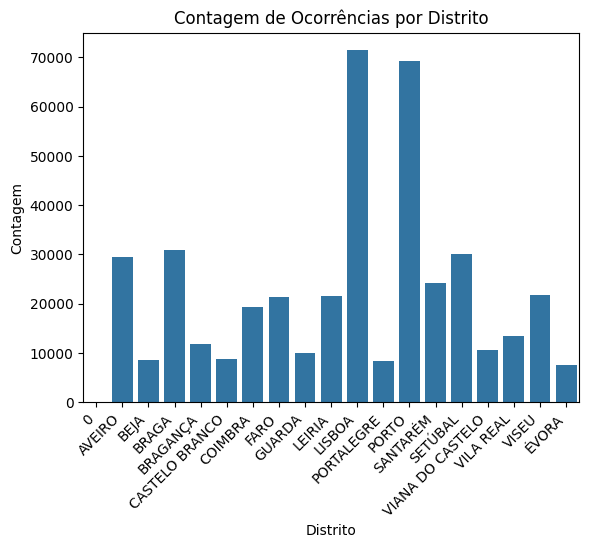

In [9]:
# @title Grafico de barras com o numero de ocorrencias de acordo com o distrito
sns.barplot(x='Distrito', y='Contagem', data=dados_distrito)

plt.title('Contagem de Ocorrências por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Contagem')

plt.xticks(rotation=45, ha='right')

plt.show()

In [10]:
# @title Agrupar por concelho no distrito de Viseu

dados_viseu = df[df['Distrito'] == 'VISEU']
dados_viseu = dados_viseu.groupby('Concelho').size().reset_index(name='Contagem')

dados_viseu

,Concelho,Contagem
0,ARMAMAR,288
1,CARREGAL DO SAL,849
2,CASTRO DAIRE,1206
3,CINFÃES,1458
4,LAMEGO,1436
5,MANGUALDE,1127
6,MOIMENTA DA BEIRA,696
7,MORTÁGUA,626
8,NELAS,1193
9,OLIVEIRA DE FRADES,671


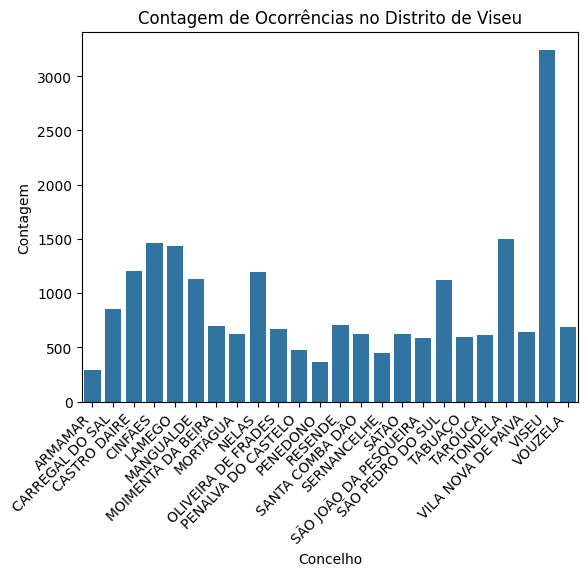

In [11]:
# @title Grafico de barras com o numero de ocorrencias no distrito de viseu
sns.barplot(x='Concelho', y='Contagem', data=dados_viseu)

plt.title('Contagem de Ocorrências no Distrito de Viseu')
plt.xlabel('Concelho')
plt.ylabel('Contagem')

plt.xticks(rotation=45, ha='right')

plt.show()

In [13]:
# @title Agrupar os dados anualmente

df['DataOcorrencia'] = pd.to_datetime(df['DataOcorrencia'])
df['Data_Ano'] = df['DataOcorrencia'].dt.to_period('Y')
df_ano = df.groupby('Data_Ano').size().reset_index(name='Contagem')
df_ano = df_ano.sort_values(by='Data_Ano')

df_ano

,Data_Ano,Contagem
0,2016,120743
1,2017,141431
2,2018,156572


In [16]:
# @title Agrupar os dados mensalmente

df['DataOcorrencia'] = pd.to_datetime(df['DataOcorrencia'])
df['Data_Mes'] = df['DataOcorrencia'].dt.to_period('M')
df_mes = df.groupby('Data_Mes').size().reset_index(name='Contagem')
df_mes = df_mes.sort_values(by='Data_Mes')

df_mes

,Data_Mes,Contagem
0,2016-01,2
1,2016-02,1
2,2016-03,168
3,2016-04,321
4,2016-05,9581
5,2016-06,14368
6,2016-07,17283
7,2016-08,19064
8,2016-09,16630
9,2016-10,15354


from matplotlib import pyplot as plt
df_mes['Contagem'].plot(kind='hist', bins=20, title='Contagem')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_mes['Contagem'].plot(kind='line', figsize=(8, 4), title='Contagem')
plt.gca().spines[['top', 'right']].set_visible(False)

In [69]:
# @title Agrupar os dados diariamente

df['DataOcorrencia'] = pd.to_datetime(df['DataOcorrencia'])
df['Data_Dia'] = df['DataOcorrencia'].dt.to_period('D')
df_dia = df.groupby('Data_Dia').size().reset_index(name='Contagem')
df_dia = df_dia.sort_values(by='Data_Dia')

df_dia

,Data_Dia,Contagem
0,2016-01-09,1
1,2016-01-24,1
2,2016-02-13,1
3,2016-03-14,39
4,2016-03-15,8
...,...,...
1020,2018-12-27,267
1021,2018-12-28,271
1022,2018-12-29,265
1023,2018-12-30,437


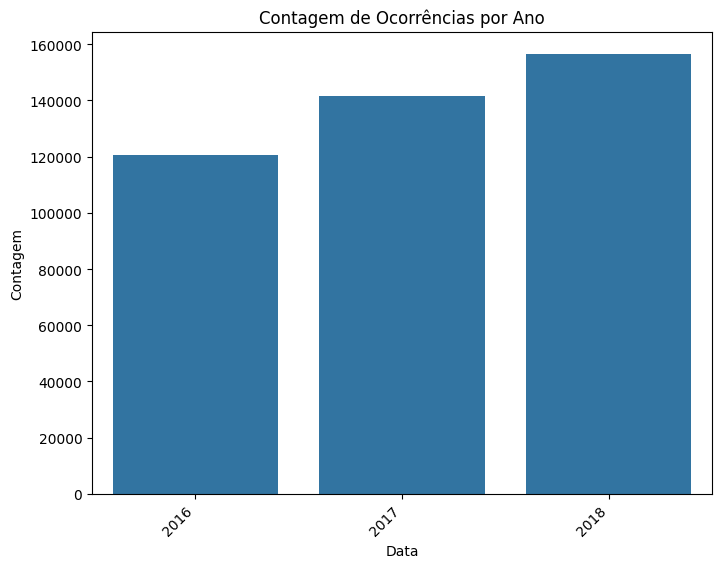

In [44]:
# @title Grafico de barras com o numero de ocorrencias por ano
plt.figure(figsize=(8, 6))
sns.barplot(x='Data_Ano', y='Contagem', data=df_ano)

plt.title('Contagem de Ocorrências por Ano')
plt.xlabel('Data')
plt.ylabel('Contagem')

plt.xticks(rotation=45, ha='right')

plt.show()

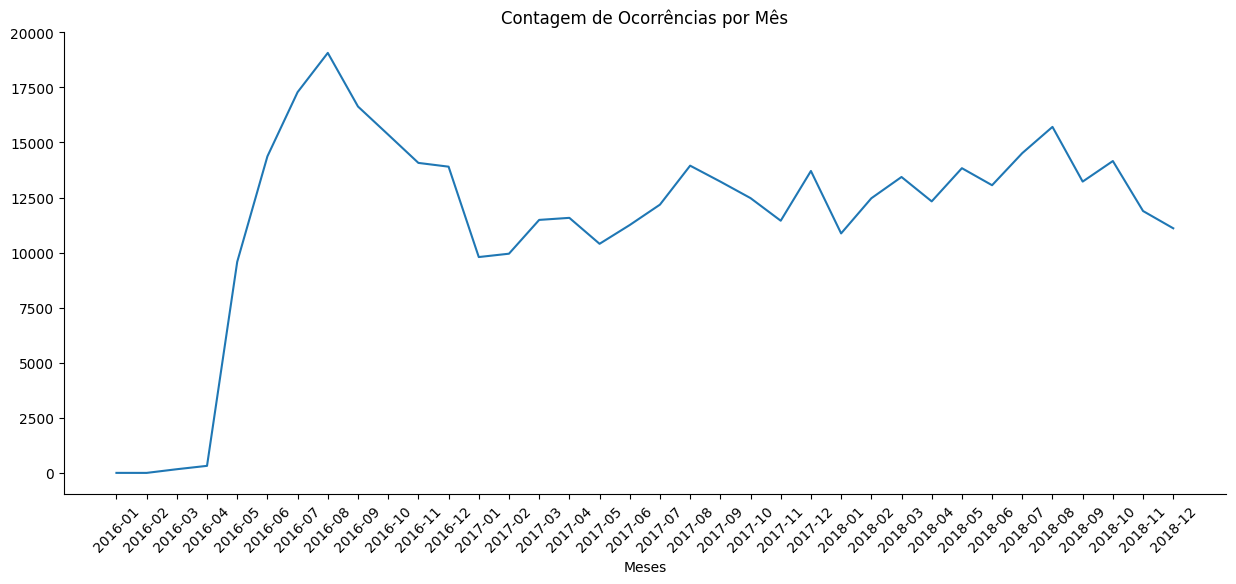

In [50]:
# @title Grafico de linhas com o numero de ocorrencias por mês

ax = df_mes['Contagem'].plot(kind='line', figsize=(15, 6), title='Contagem de Ocorrências por Mês')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Meses')
ax.set_xticks(df_mes.index)
ax.set_xticklabels(df_mes['Data_Mes'], rotation=45)
plt.show()

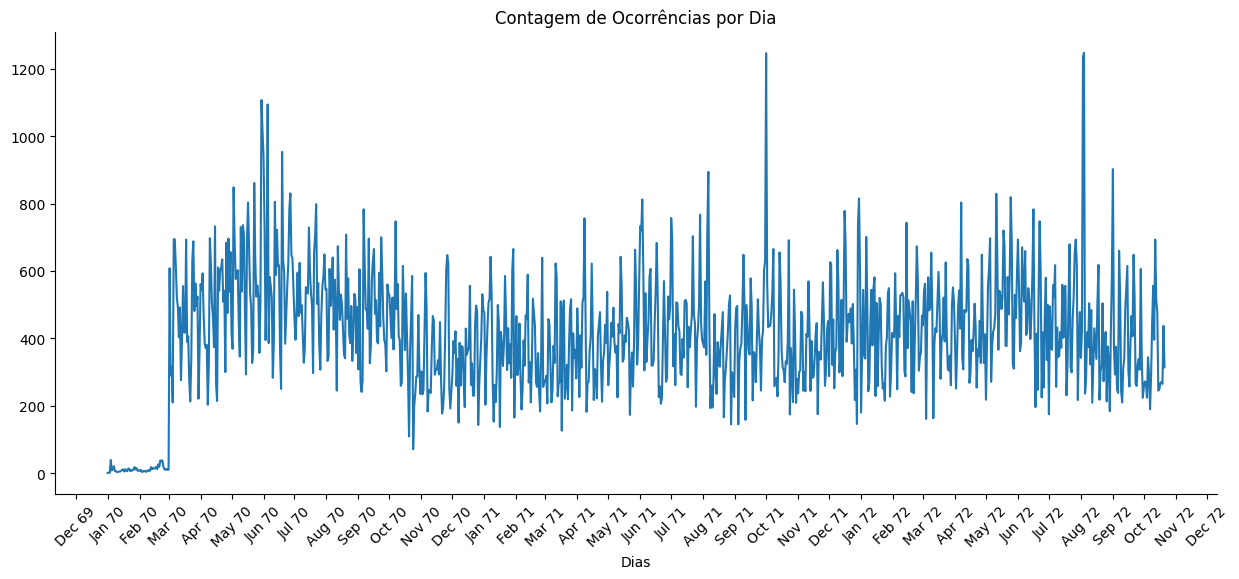

In [68]:
# @title Grafico de linhas com o numero de ocorrencias por dia

ax = df_dia['Contagem'].plot(kind='line', figsize=(15, 6), title='Contagem de Ocorrências por Dia')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Dias')
ax.set_xticks(df_dia.index)
ax.set_xticklabels(df_dia['Data_Dia'], rotation=45)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
plt.show()

In [ ]:
df['hora'] = df['DataOcorrencia'].dt.hour
contagem_horas = df.groupby('hora').size().reset_index(name='Contagem')

contagem_horas

,hora,Contagem
0,0.0,8792
1,1.0,8737
2,2.0,8323
3,3.0,7560
4,4.0,6575
5,5.0,4906
6,6.0,4445
7,7.0,6612
8,8.0,14536
9,9.0,19467


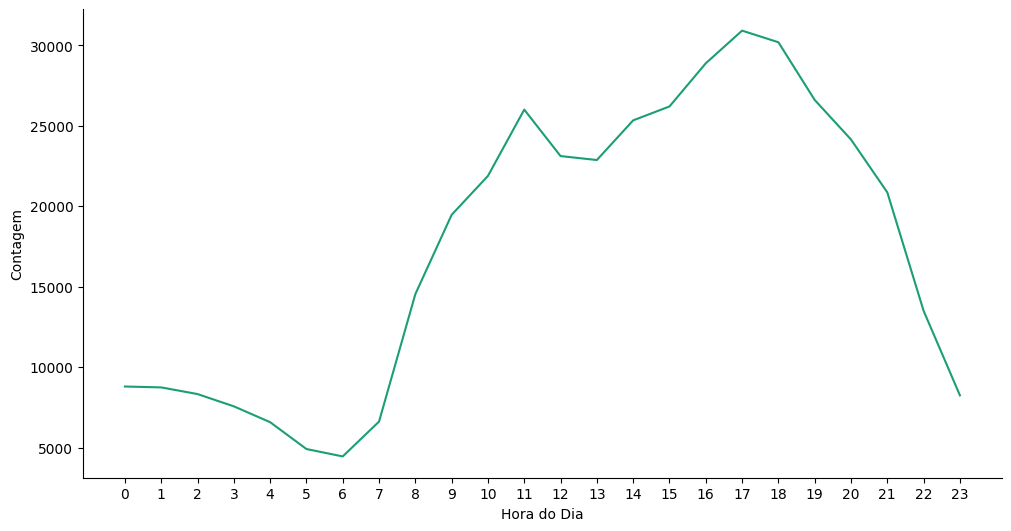

In [ ]:
# @title Grafico de barras com o numero de ocorrencias por hora
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hora']
  ys = series['Contagem']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = contagem_horas.sort_values('hora', ascending=True)
_plot_series(df_sorted, '')
df_sorted['hora'] = df_sorted['hora'].astype(int)
ax.set_xticks(df_sorted['hora'])
ax.set_xticklabels(df_sorted['hora'])
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hora do Dia')
_ = plt.ylabel('Contagem')